## Alumno : Rubén Álvarez Mosquera

---
# **Aprendizaje NO Spuervisado**

*Prefacio : Nuestra tarea consiste en entrenar un modelo No Supervisado con el caso del fraude de las tarjetas de crédito*

<< The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.>>


---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [2]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [3]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de "Seaborn"

In [4]:
# tamaño del texto en las etiquetas por defecto para Matplotlib
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)


# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [5]:
CREDIT_PATH = os.path.join("dataset");

def load_insurance_data(credit_path):
    csv_path = os.path.join(credit_path, "creditcard.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [6]:
credit = load_insurance_data(CREDIT_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [7]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Creamos un archivo backup

In [9]:
credit_backup = credit.copy()

## Revisamos el estado de los datos
---

Revisamos las columnas en general

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Comprobación del número de NaN por categoría

In [11]:
# De forma global
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Podemos observar que no contiene NaN alguno en el dataset

## Revisamos las columnas

---

### "Time" ------------------------------------------
*Número de identificación del tiempo, que indica los segundos pasados entre cada transacción y la primera transacción del dataset*

In [12]:
credit['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [13]:
credit['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

- Es una variable cuantitativa continua, aunque sus valores parezcan discretos por carecer de decimales
- Observamos que ciertos valores se repiten, por lo que no es de valor único
- No con tiene NaN

### "V1 to V28" ------------------------------------------
*Son columnas que representas "Features", pero que por motivos de confidencialidad , no sabemos lo que significa cada una*

Ejemplo con V1

In [14]:
credit['V1'].describe()

count    2.848070e+05
mean     3.918649e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

In [15]:
credit['V1'].value_counts()

 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.938907     1
 1.375417     1
-3.762431     1
 1.420284     1
-0.533413     1
Name: V1, Length: 275663, dtype: int64

Ejemplo con V20

In [16]:
credit['V20'].describe()

count    2.848070e+05
mean     5.126845e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64

In [17]:
credit['V20'].value_counts()

-0.180370    77
-0.132080    77
-0.187421    62
 0.005757    60
-0.120714    53
             ..
 0.119238     1
-0.377823     1
-0.729419     1
 0.116184     1
 0.382948     1
Name: V20, Length: 275663, dtype: int64


- Son variables cuantitativas contínuas y que oscilan entre valores negativos a positivos, cercanos a la decena
- No contienen NaN

### "Amount" ------------------------------------------
*Es la cantidad de la transacción*


In [18]:
credit['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


- Son variables cuantitativas contínuas y que oscilan entre 25K y 0
- No contienen NaN

### "Class" ------------------------------------------
*Esto representa una opción binaria, con un 1 si era fraude y un 0 en caso contrario*


In [19]:
credit['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [20]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Es una variable cuantitativa discreta con 2 valores
- 1 para los fraudes y 0 para los que no
- No contiene NaN
- Vemos que los fraudes no llegan a los 500 de un total aproximado de 285K

---
---
---

## Estudio numérico de la correlación entre los datos para obtener información relevante
---

### Revisión de los histogramas de las columnas
---

Realizamos una visualización de los histogramas de los datos, que representan el número de veces que un valor aparece, representando la distribución de los casos por categoría para tener una idea de su cantidad, dispersión ,etc...

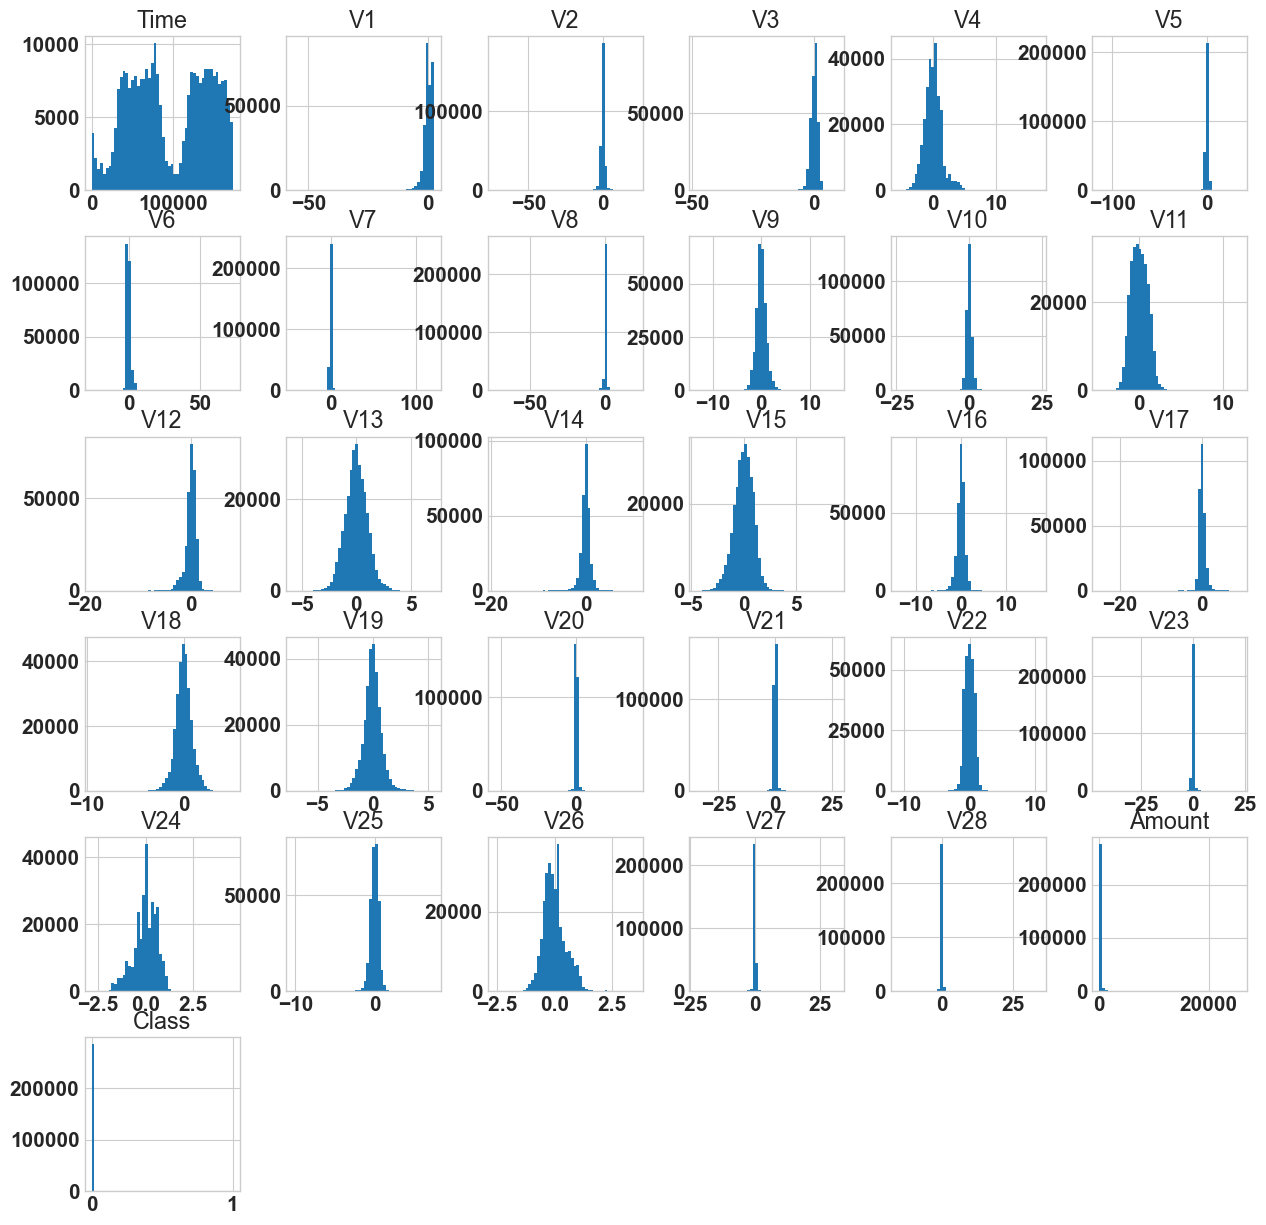

In [21]:
credit.hist(bins=50, figsize =(15,15))
plt.show()

Pasaremos a revisar unos gráficos que nos arrojen algo de luz sobre los datos, para poder sacar alguna conclusión valiosa para este estudio.

### Fraudes:

In [24]:

data = list(credit['Class'].value_counts())
data

[284315, 492]

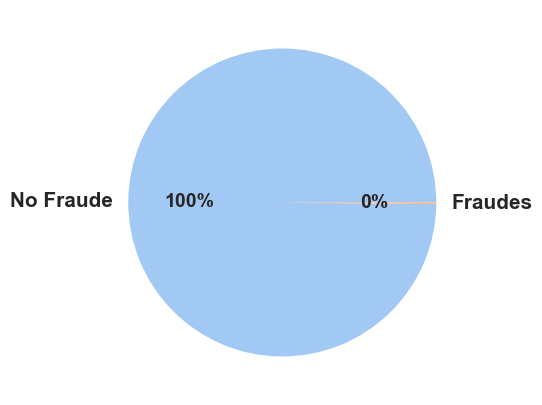

In [25]:
data = list(credit['Class'].value_counts())
labels = ['No Fraude', 'Fraudes']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

- Podemos observar que el porcentaje de fraudes no llega al 1 %

In [42]:
print('No Fraudes', round(credit['Class'].value_counts()[0]/len(credit) * 100,2), '% del dataset')
print('Fraudes', round(credit['Class'].value_counts()[1]/len(credit) * 100,2), '% del dataset')

No Fraudes 99.83 % del dataset
Fraudes 0.17 % del dataset


### Fraudes por tiempo


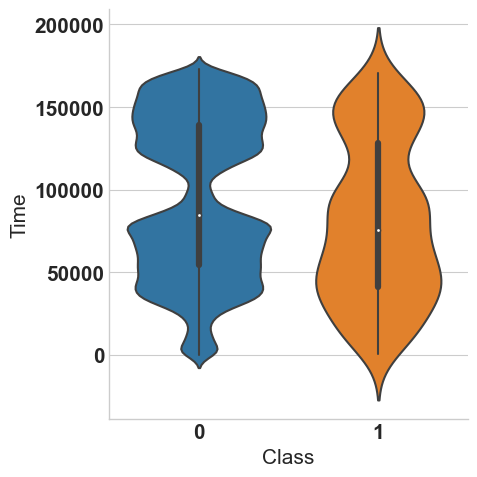

In [27]:
sns.catplot(
    data=credit, x="Class", y="Time",
    kind="violin", split=True,
)

- Com podemos ver, cuando el tiempo ronda los 100K hay una bajada de los No Fraudulentos, mientrea que los fraudulentos no sufren bajadas
- También destacar que los fraudes se producen más frecuentemente en el valor de tiempo 50K, aunque tienen una distribución de minimos y máximos altos
- De hecho podemos observar que a partir de 175K de Tiempo, ya no se producen transacciones correctas, y sin embargo hay fraudulentas ocurriendo

---
---
---

# Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [28]:
corr_matrix = credit.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [29]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


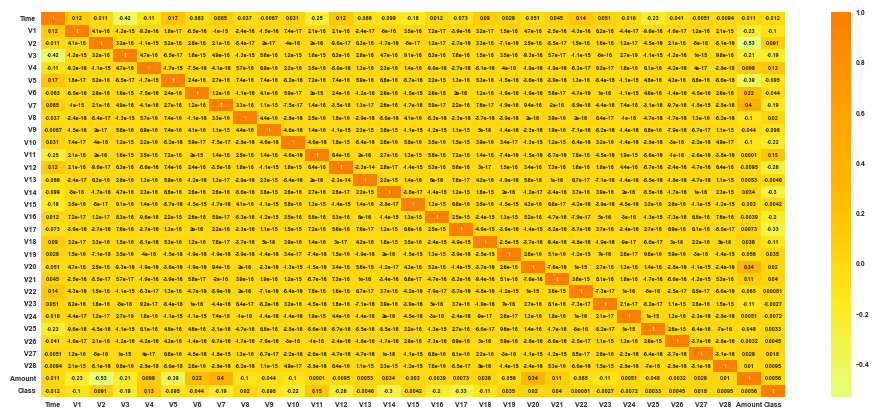

In [35]:
corr_norm = credit.corr()

# Reduciremos el tamaño de fuente para este gráfico (y lo volveremos a dejar como estaba) por el tamaño de celdas
# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=5)
mpl.rc('xtick', labelsize=5)
mpl.rc('ytick', labelsize=5)
plt.rcParams['font.size'] =4
plt.rcParams['figure.figsize'] = [12,5]

sns.heatmap(corr_norm, cmap = 'Wistia', annot= True)

# Volvemos a dejar el tamaño de letras por defecto
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
plt.rcParams['font.size'] =14
plt.rcParams['figure.figsize'] = [8,5]

## Conclusiones preliminares:
- Podemos observar débiles correlaciones lineales entre el fraude y las diferentes variables
    - V11       0.154876
    - V4        0.133447
- Las únicas que tienen correlaciones negativas algo elevadas como en el caso de:
    - V10      -0.216883
    - V12      -0.260593
    - V14      -0.302544
    - V17      -0.326481


---
---
---

In [ ]:
.........................................................


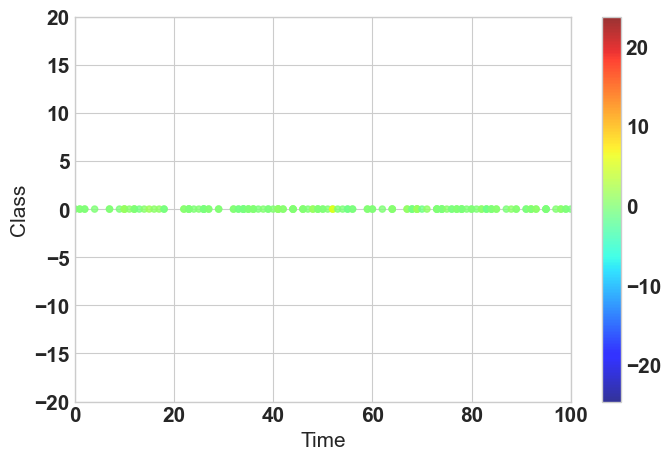

In [40]:
credit.plot(kind="scatter", 
             x= "Time",
             y = "Class",
             c=credit["V10"],
             cmap = plt.get_cmap("jet"),
             alpha=0.8)

plt.axis([0,100,-20,20]);

# Entrenando modelos de Clasificación
---

Revisamos el Datasets antes de usarlos en los entrenamientos del modelo

Usaremos el modelo normalizado "titanic_norm"

In [76]:
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   female       418 non-null    float64
 6   male         418 non-null    float64
 7   Cabin A      418 non-null    float64
 8   Cabin B      418 non-null    float64
 9   Cabin C      418 non-null    float64
 10  Cabin D      418 non-null    float64
 11  Cabin E      418 non-null    float64
 12  Cabin F      418 non-null    float64
 13  Cabin G      418 non-null    float64
 14  Cabin U      418 non-null    float64
 15  Cherburgo    418 non-null    float64
 16  Queenstown   418 non-null    float64
 17  Southampton  418 non-null    float64
 18  FirstClass   418 non-null    float64
 19  SecondCl

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Cherburgo,Queenstown,Southampton,FirstClass,SecondClass,ThirdClass
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### 
---

## Creación del Train y Test Set
---

Primeramente generaremos una semilla de aletoriedad, que normalmente se usa el valor 42, que usaremos para barajar los índices del Dataset a la hora de realizar la división del Dataset de Entrenamiento del de Test

In [77]:
# plantamos una semilla
np.random.seed(42)

Necesitamos crear, del total de datos del Dataset, una subdivisión. Una parte será para entrenar al modelo (TrainSet) y otro para comprobar el resultado del entrenamiento (TestSet)

Creamos una función para este trabajo llamada "split_train_test", para separ dichos Set

Aquí podemos ver la función np.random.permutation, a la que hemos previamente configurado con la semilla "42", para que baraje de forma "aleatoria" los índices, tanto del dataset de entrenamiento, como el de Test

In [78]:
def split_train_test(data, test_ratio):
    test_set_size  =int(len(titanic_norm)*test_ratio)
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Aplicaremos normalmente una división 80/20. Otros ratios pueden ser 70:30, 60:40, e incluso 50:50, pero en este caso usaremos el primero, ya que es el más común.

In [79]:
# Agreagamos el ratio de split
ratio = 0.2
# Ejecutamos la función
X_train, X_test = split_train_test(titanic_norm, ratio)
# Revisamos el número de filas en cada Set
print('Número de filas Total del dataset : ',len(titanic_norm))
print('Ratio : ', 100-100*ratio, '/',ratio*100) 
print('Número de filas por dataset :')
print('TrainSet : ',len(X_train))
print('TestSet  : ', len(X_test))


Número de filas Total del dataset :  418
Ratio :  80.0 / 20.0
Número de filas por dataset :
TrainSet :  335
TestSet  :  83


Una vez que tenemos el Dataset de entrenamiento (X_train), creamos una copia con la columna de resultados, que llamaremos "y_train" y eliminaremos dicha columna del Dataset de entrenameiento (X_train)

In [80]:
# Creamos un nuevo Dataset con la columna Charges a predecir con el modelo
y_train = X_train["Survived"].copy()
# Eliminamos dicha columna para el modelo de entrenamiento
X_train = X_train.drop("Survived", axis=1)

In [81]:
y_train

66     1
336    0
31     0
84     0
287    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 335, dtype: int64

---
---
---

## Entrenando y evaluando :
---

## Casificador SGD 'Descenso del gradiente' o 'Stochastic Gradient Descent'
---

- Este modelo iterativo, realizará una comprobación constante de la funcion coste o pérdida hacie el máximo descenso hacia el equilibrio en las puntuaciones


Con esta importación tambíen llamaremos al método "cross_val_score" , para evaluar el rendimiento del modelo

In [82]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [83]:
# Creamos un Clasificador SGD con random 42
sgd_clf = SGDClassifier(random_state=42)
# Entrenamos el modelo
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [84]:
y_test = X_test["Survived"].copy()
X_test = X_test.drop("Survived", axis=1)

In [87]:

sgd_predictions = sgd_clf.predict(X_test)
sgd_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

## K-fold Cross-Validation

In [86]:
cross_val_score(sgd_clf, X_train, y_train, cv=8, scoring="accuracy")

array([0.4047619 , 1.        , 1.        , 0.80952381, 0.64285714,
       1.        , 1.        , 1.        ])

## Dummy Classifier

Como no nos podemos fiar de los resultados anteriores, realizaremos una prueba con un ·Dummy Clasifier" el cual predecirá que NADIE sobrevive. 

In [88]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

print(any(dummy_clf.predict(X_train)))


False


Este Falso nos quiere decir que no se ha detectado ningús superviviente (como es de esperar en el caso de los Dummy Clasifiers)

In [89]:
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.64285714, 0.64285714, 0.64864865])

Estos resultados de aproximadamente el 64% es porque, el 64% de las personas No sobrevivieron, por lo tanto si (como en este caso con el Dummy Classifier) decimos que NINGUNA persona ha sobrevivido, acertaremos en el 64% de las ocasiones.

## Matrices de Confusión

Una mejor forma de acercarnos a unas métricas de rendimiento de los modelos, son las matrices de confusión, las cuales nos aportarán las métricas de la Precisión y la Sensibilidad (Precision/Recall)

In [90]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm


array([[191,  25],
       [ 18, 101]], dtype=int64)

### Esto significa que :
  - (TN) True Negative = 184
  - (FP) False Positive=  32   >>> Errores de Tipo I
  - (FN) False Negative =  0   >>> Errored de Tipo II
  - (TP) True Positive = 119

### Precisión / Precision:
$$ precision = \frac{TP}{TP + FP} $$

Precisión del modelo

In [93]:
precision = cm[1][1]/(cm[1][1]+cm[0][1])
precision

0.8015873015873016

### Sensibilidad / Recall:
$$ sensibilidad = \frac{TN}{TN + FN} $$

Sensibilidad del modelo

In [94]:
recall = cm[0][0]/(cm[0][0]+cm[1][0])
recall

0.9138755980861244

### Funciones "Precision" & "Recall" para realizar el mismo trabajo desde una librería

In [95]:
from sklearn.metrics import precision_score, recall_score

In [96]:
precision_score(y_train, y_train_pred)

0.8015873015873016

In [97]:
recall_score(y_train, y_train_pred)

0.8487394957983193

## F1 Score

In [98]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


0.8244897959183675

La metrica F1 Score beneficia a los clasificadores que tienen un valor parecedo para "Precision" y "Recall"

## Precision VS Recall ( Precisión VS Sensibilidad )

Hay que tener en cuenta que ámbas métricas se relacionan de tal modo que no se pueden tener al mismo tiempo, y que , si aumentas la sensibilidad reducirás la precisión y viceversa

Como la librería Scikit-learn no nos deja ver los límites(theshold) directamente, podemos saberlo a través del método "decision_function()" en vez de "predict()"

#### Con el siguiente ejemplo , podemos ver que ocurre cuando el límite lo ponemos a 0 o a 3000

In [99]:
y_scores = sgd_clf.decision_function(X_test)
y_scores



array([ -858.11101459,   618.89355552,  -798.23615637,  -950.51566406,
         510.05054766,  -933.51362182,   464.93058905,  -902.75157475,
         448.91413313,  -964.70616385, -1073.59345185,   613.1507861 ,
         458.04059122,   682.74411819,  -964.70616385,  -933.95384859,
         461.97769589,  -806.86692776,  -991.67189134, -1020.50994233,
        -875.06793635,  -897.98947305,   358.85696372,  -952.22520195,
         560.22018017,   626.89717821,   528.48872439,  -956.69830057,
        -851.72326711,  -952.22520195,  -949.80240311,   465.08898137,
         563.79572259,  -964.70616385,   511.93309092,  -968.10052881,
         642.91064975,  -827.65425389,   439.04894822,  -703.27635996,
         642.91064975,   453.36227844,  -854.12044739,  -948.41445111,
        -836.96929779,  -990.54954186,   561.07155375,   491.22457595,
         516.89362883,  -948.06792701,  -759.60724918,   575.58075341,
         467.86761277,  -905.23164573,  -889.166364  ,   413.32985969,
      

In [100]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [101]:
y_some_digit_pred

array([False,  True, False, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False])

Vemos disparidad de resultados con un límite/threshold = 0

In [102]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)


In [103]:
y_some_digit_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

En cambio podemos observar como todos son Flalsos cuando el límite es 3000

#### Para poder visualizar el límite/threshold usaremos la validación cruzada con el método "decision_function"

In [104]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,method="decision_function")

In [105]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [126]:
# Pongamos un límite de :
threshold = 0

### Gráfica Presicion/Recall VS Threshold

##### En esta gráfica podemos observar que cuando el threshold alcanza sus máximos respecto a Precisión y Sensibilidad

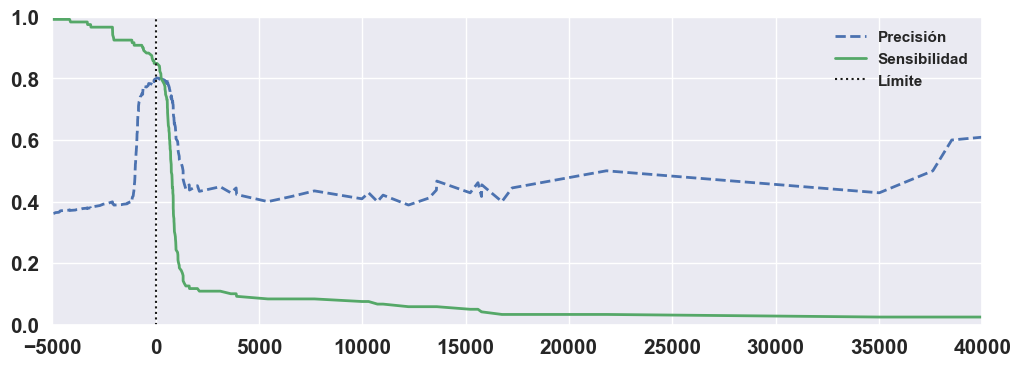

In [127]:
plt.figure(figsize=(12, 4))
plt.axis([-5000, 40000, 0, 1])
plt.plot(thresholds, precisions[:-1], "b--", label="Precisión", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Sensibilidad", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Límite")
plt.legend()
plt.show()

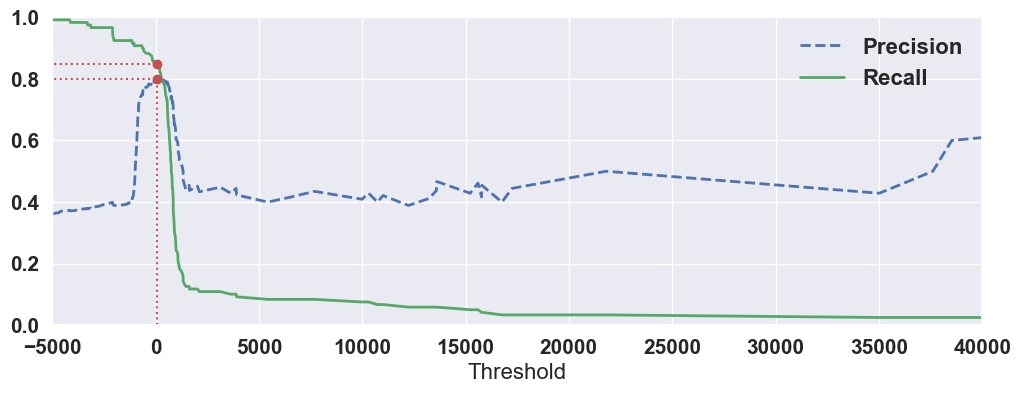

In [129]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2);
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2);
    plt.legend(loc="upper right", fontsize=16);
    plt.xlabel("Threshold", fontsize=16);
    plt.grid(True);
    plt.axis([-5000, 40000, 0, 1]);

recall_90_precision = recalls[np.argmax(precisions >= 0.80)];
threshold_90_precision = thresholds[np.argmax(precisions >= 0.80)];

plt.figure(figsize=(12, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.8], "r:");
plt.plot([-50000, threshold_90_precision], [0.8, 0.8], "r:");
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:");
plt.plot([threshold_90_precision], [0.8], "ro");
plt.plot([threshold_90_precision], [recall_90_precision], "ro");
plt.show();

### Precision VS Recall

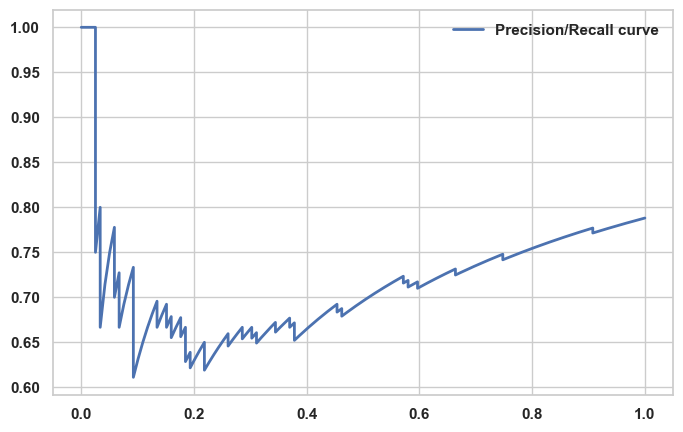

In [227]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.legend()
plt.show()


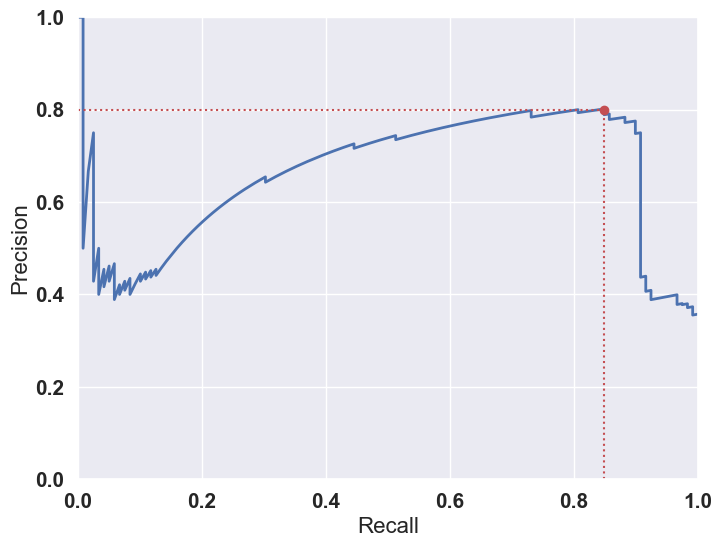

In [131]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2);
    plt.xlabel("Recall", fontsize=16);
    plt.ylabel("Precision", fontsize=16);
    plt.axis([0, 1, 0, 1]);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
plt.plot([recall_90_precision, recall_90_precision], [0., 0.8], "r:");
plt.plot([0.0, recall_90_precision], [0.8, 0.8], "r:");
plt.plot([recall_90_precision], [0.8], "ro");
plt.show();

---
---
---

## The ROC Curve

In [132]:
from sklearn.metrics import roc_curve;

fpr, tpr, thresholds = roc_curve(y_train, y_scores);

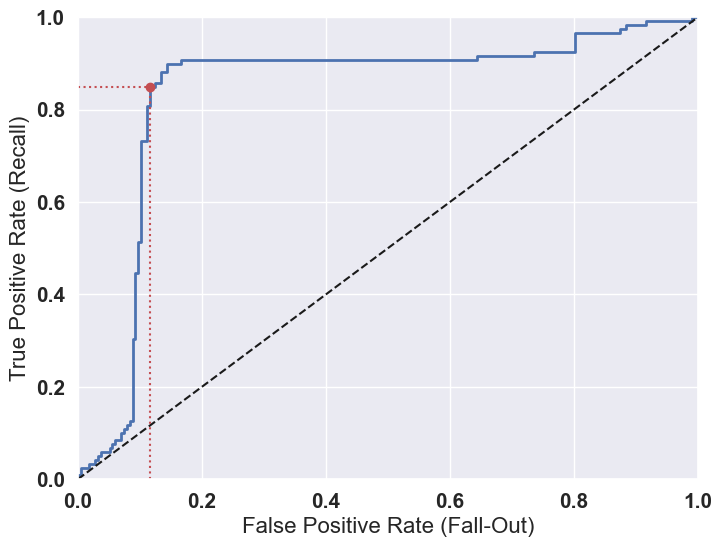

In [133]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label);
    plt.plot([0, 1], [0, 1], 'k--');
    plt.axis([0, 1, 0, 1]);
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16);
    plt.ylabel('True Positive Rate (Recall)', fontsize=16);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr);
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)];
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.show();

In [134]:
from sklearn.metrics import roc_auc_score;

roc_auc_score(y_train, y_scores)

0.8392857142857142

In [136]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf,X_train, y_train, cv=3,method="predict_proba");

In [138]:
y_scores_forest=y_probas_forest[:,1];

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores_forest);

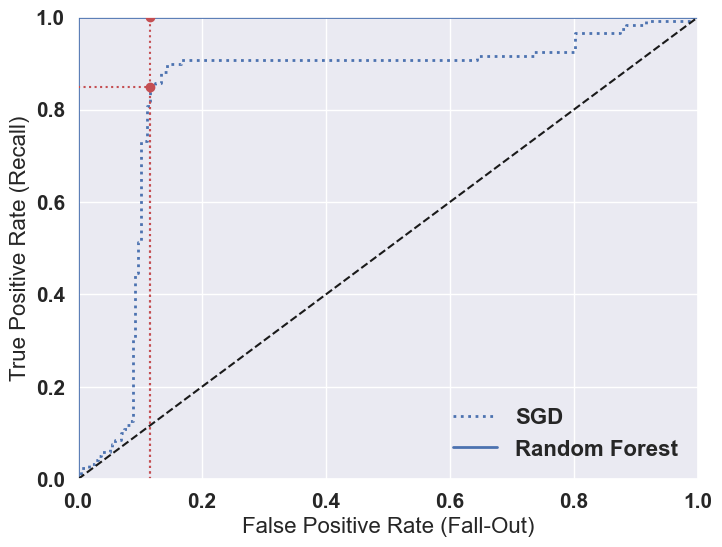

In [139]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)];

plt.figure(figsize=(8, 6));
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

In [140]:
roc_auc_score(y_train,y_scores_forest)

1.0

In [141]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3);
precision_score(y_train,y_train_pred_forest)

1.0

In [142]:
recall_score(y_train, y_train_pred_forest)

1.0

---
---
---